In [1]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
#importing the datasets
train_data = pd.read_csv('train.csv')
features_data=pd.read_csv('features.csv')
stores_data=pd.read_csv('stores.csv')

In [3]:
#merging the three datasets  
df=train_data.merge(features_data,how='left',on=['Store','Date'])
print(df.shape)
df.head(5)

(421570, 15)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df=df.merge(stores_data,how='left',on='Store')
print(df.shape)
df.head(5)

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [5]:
#Check Nans
df.isna().sum(axis=0)

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [6]:
# Fill Nans with zero as Nans are present only in Markdowns where filling with zeroes is okay.
df_new=df.fillna(0)

In [7]:
#Since negative values exist in three columns,lets replace with zero
df_new.loc[df_new['Weekly_Sales'] < 0.0,'Weekly_Sales'] = 0.0
df_new.loc[df_new['MarkDown2'] < 0.0,'MarkDown2'] = 0.0
df_new.loc[df_new['MarkDown3'] < 0.0,'MarkDown3'] = 0.0

In [8]:
df_new=df_new.drop(['IsHoliday_y'], axis=1)
df_new.head(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315


In [9]:
import keras
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [10]:
train=df_new

In [11]:
train = train[['Store', 'Dept', 'Date', 'Unemployment', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Weekly_Sales']]

In [12]:
print(train['Date'].min(), train['Date'].max())

2010-02-05 2012-10-26


In [13]:
train.dtypes

Store             int64
Dept              int64
Date             object
Unemployment    float64
IsHoliday_x        bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Weekly_Sales    float64
dtype: object

In [14]:
#Encoding non numerical columns
from sklearn import preprocessing
cat_col = ['IsHoliday_x','Type']
for col in cat_col:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(train[col].values.astype('str'))
    train[col] = lbl.transform(train[col].values.astype('str'))

In [15]:
train.dtypes

Store             int64
Dept              int64
Date             object
Unemployment    float64
IsHoliday_x       int64
Type              int64
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Weekly_Sales    float64
dtype: object

In [16]:
#Changing type of Date column
train['Date']=pd.to_datetime(train['Date'],format='%Y-%m-%d')
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Unemployment           float64
IsHoliday_x              int64
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Weekly_Sales           float64
dtype: object

In [17]:
split_date = pd.datetime(2012,8,24)
split_date

datetime.datetime(2012, 8, 24, 0, 0)

In [18]:
#Splitting data to train and dev set
train_set = train.loc[train['Date'] <= split_date]
dev_set = train.loc[train['Date'] > split_date]

In [19]:
#  Split dev set into validation and test set
split_date_dev = pd.datetime(2012,9,25)
val_set = dev_set.loc[dev_set['Date'] <= split_date_dev]
test_set = dev_set.loc[dev_set['Date'] > split_date_dev]

In [20]:
#Changing index to be date
train_set = train_set.set_index('Date')
val_set = val_set.set_index('Date')
test_set = test_set.set_index('Date')

In [21]:
train_set_array = train_set.iloc[:,:].values
val_set_array = val_set.iloc[:,:].values
test_set_array = test_set.iloc[:,:].values

In [22]:
print("Shape of train, val and test array:\n",train_set_array.shape,"\n",val_set_array.shape,"\n",test_set_array.shape)

Shape of train, val and test array:
 (394879, 15) 
 (11854, 15) 
 (14837, 15)


In [23]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set_array[:,:])
val_set_scaled = sc.fit_transform(val_set_array[:,:])
test_set_scaled = sc.fit_transform(test_set_array[:,:])

print(train_set_scaled.shape, val_set_scaled.shape, test_set_scaled.shape)

(394879, 15) (11854, 15) (14837, 15)


In [24]:
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

X_train, y_train = train_set_scaled[:,:-1], train_set_scaled[:,-1]
X_val, y_val = val_set_scaled[:,:-1], val_set_scaled[:,-1]
X_test, y_test = test_set_scaled[:,:-1], test_set_scaled[:,-1]

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(394879, 14) (394879,) (11854, 14) (11854,) (14837, 14) (14837,)


In [25]:
# Create data structure

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [26]:
print(X_train.shape, X_val.shape, X_test.shape)

(394879, 1, 14) (11854, 1, 14) (14837, 1, 14)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

In [28]:
# Initialising RNN
regressor = Sequential()

In [29]:
#adding first  LSTM layer and some dropout regularization
regressor.add(LSTM(units = 10, return_sequences = True, activation = 'relu', input_shape = (X_train.shape[1], 14)))
regressor.add(Dropout(0.5))

In [30]:
#adding a second LSTM layer and some dropout regularization
regressor.add(LSTM(units = 10, return_sequences = True, activation = 'relu'))
regressor.add(Dropout(0.5))

In [31]:
# # adding a third LSTM layer and some dropout regularization
regressor.add(LSTM(units = 10, return_sequences = True, activation = 'relu'))
regressor.add(Dropout(0.7))

In [32]:
# adding a fourth LSTM layer and some dropout regularization
regressor.add(LSTM(units = 10, return_sequences = False, activation = 'relu'))
regressor.add(Dropout(0.5))

In [33]:
# Adding the output layer
#regressor.add(Flatten())
regressor.add(Dense(units=1, activation = 'sigmoid'))

In [34]:
# Compiling the RNN
regressor.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])

In [35]:
# Fitting the RNN to the training set
history = regressor.fit(X_train, 
              y_train, 
              epochs = 20, #Can be made 13 from avlidation loss graph
              batch_size = 512, 
              validation_data = (X_val, y_val),
              verbose = 1)

Train on 394879 samples, validate on 11854 samples
Epoch 1/20
394879/394879 [==============================] - 7s 17us/step - loss: 0.0466 - acc: 0.0032 - val_loss: 0.0200 - val_acc: 0.0028
Epoch 2/20
394879/394879 [==============================] - 4s 11us/step - loss: 0.0043 - acc: 0.0032 - val_loss: 0.0200 - val_acc: 0.0028
Epoch 3/20
394879/394879 [==============================] - 4s 11us/step - loss: 0.0029 - acc: 0.0032 - val_loss: 0.0200 - val_acc: 0.0028
Epoch 4/20
394879/394879 [==============================] - 4s 11us/step - loss: 0.0026 - acc: 0.0032 - val_loss: 0.0200 - val_acc: 0.0028
Epoch 5/20
394879/394879 [==============================] - 4s 11us/step - loss: 0.0024 - acc: 0.0032 - val_loss: 0.0200 - val_acc: 0.0028
Epoch 6/20
394879/394879 [==============================] - 4s 11us/step - loss: 0.0023 - acc: 0.0032 - val_loss: 0.0200 - val_acc: 0.0028
Epoch 7/20
394879/394879 [==============================] - 4s 11us/step - loss: 0.0021 - acc: 0.0032 - val_loss: 0

In [36]:
predicted_sales = regressor.predict(X_test)
predicted_sales_train = regressor.predict(X_train)

In [37]:
# Reshape X_test for inverse scaling
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

In [38]:
print(X_test[:,:].shape, predicted_sales.shape)

(14837, 14) (14837, 1)


In [39]:
# Concatenate in the same order-X_test[:,:] followed by predicted_sales
predicted_weekly_sales = np.concatenate((X_test[:,:], predicted_sales),axis=1)


In [40]:
predicted_weekly_sales = sc.inverse_transform(predicted_weekly_sales)
predicted_weekly_sales = predicted_weekly_sales[:,14:15]
predicted_weekly_sales

array([[6539.69709678],
       [6539.69709678],
       [6539.69709678],
       ...,
       [2446.6414043 ],
       [2264.81539058],
       [2911.29185809]])

In [41]:
y_test = y_test.reshape((y_test.shape[0],1))

In [42]:
observed_weekly_sales = np.concatenate((X_test[:,:], y_test),axis=1)
observed_weekly_sales = sc.inverse_transform(observed_weekly_sales)
observed_weekly_sales = observed_weekly_sales[:,14:15]
observed_weekly_sales

array([[18947.81],
       [21904.47],
       [22764.01],
       ...,
       [ 1061.02],
       [  760.01],
       [ 1076.8 ]])

In [43]:
print(observed_weekly_sales.shape, predicted_weekly_sales.shape)

(14837, 1) (14837, 1)


In [44]:
obs_pred_df = pd.DataFrame({'Date': test_set.index,'Observed Sales': observed_weekly_sales.reshape(observed_weekly_sales.shape[0]),'Predicted Sales': predicted_weekly_sales.reshape(predicted_weekly_sales.shape[0])})

obs_pred_df.head()

,Date,Observed Sales,Predicted Sales
0,2012-09-28,18947.81,6539.697097
1,2012-10-05,21904.47,6539.697097
2,2012-10-12,22764.01,6539.697097
3,2012-10-19,24185.27,6293.257222
4,2012-10-26,27390.81,5727.487281


In [45]:
obs_pred_df.set_index('Date', inplace=True)
obs_pred_df.head()

,Observed Sales,Predicted Sales
Date,,
2012-09-28,18947.81,6539.697097
2012-10-05,21904.47,6539.697097
2012-10-12,22764.01,6539.697097
2012-10-19,24185.27,6293.257222
2012-10-26,27390.81,5727.487281


In [46]:
test_set = test_set.reset_index()
test_set.head()

,Date,Store,Dept,Unemployment,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Weekly_Sales
0,2012-09-28,1,1,6.908,0,0,151315,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,18947.81
1,2012-10-05,1,1,6.573,0,0,151315,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,223.181477,21904.47
2,2012-10-12,1,1,6.573,0,0,151315,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,223.381296,22764.01
3,2012-10-19,1,1,6.573,0,0,151315,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,223.425723,24185.27
4,2012-10-26,1,1,6.573,0,0,151315,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,223.444251,27390.81


In [47]:
weight = np.where(test_set['IsHoliday_x']==0, 1, 5)

df = pd.DataFrame({"Date": test_set['Date'],
                   "Weight": weight,
                   "Observed_Values":observed_weekly_sales.reshape(observed_weekly_sales.shape[0]),
                  "Predicted_Values":predicted_weekly_sales.reshape(predicted_weekly_sales.shape[0])})

df['Derived'] = df['Weight']*abs(df['Observed_Values']-df['Predicted_Values'])

df.head()

,Date,Weight,Observed_Values,Predicted_Values,Derived
0,2012-09-28,1,18947.81,6539.697097,12408.112903
1,2012-10-05,1,21904.47,6539.697097,15364.772903
2,2012-10-12,1,22764.01,6539.697097,16224.312903
3,2012-10-19,1,24185.27,6293.257222,17892.012778
4,2012-10-26,1,27390.81,5727.487281,21663.322719


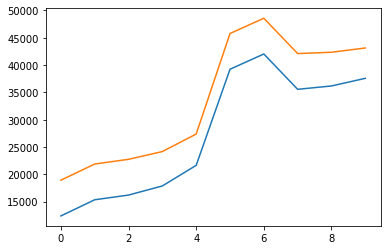

In [48]:
plt.plot(df.Derived[0:10])
plt.plot(df.Observed_Values[0:10])

In [49]:
WMAE = sum(df['Derived']) / sum(df['Weight'])
WMAE

12730.936111088342

In [53]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs( sum(df['Observed_Values'])- sum(df['Predicted_Values'])/sum(df['Observed_Values'])))
MSSE = np.mean(np.square(df['Predicted_Values'] -df['Observed_Values']))
print(MAPE, MSSE)

228098500.22196758 561995677.199496


In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

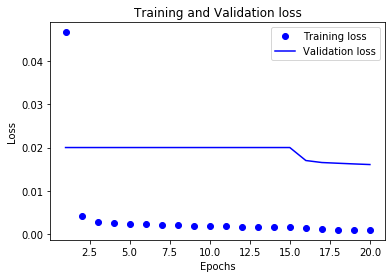

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

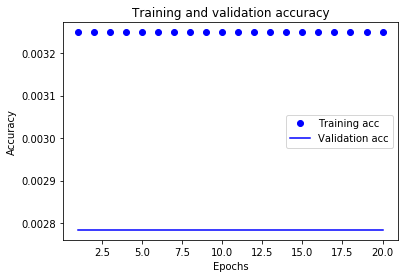

In [56]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()